In [13]:

%load_ext autoreload
%autoreload 2
import all_function_defs as f  

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# All fluxes to excel

# path = 
# f.all_fluxes_to_excel(path, iRhtoC_all_fluxes_bm)

# path = 
# f.all_fluxes_to_excel(path, iRhtoC_all_fluxes_nm)

### BIOMASS MAXIMISATION

In [14]:
# Get all fluxes over five rates and make a df

model_path = "C:\\Users\\Maive\\Desktop\\BSc_loputoo\\Model_files\\iRhto_models\\iRhtoC.xml"
glucose_uptakes = [0.476, 1.114, 1.648, 2.305, 3.1] 

biomass_rxn_ID = "BIOMASS_RT_CLIM"   
glc_ID = 'EX_glc__D_e'

iRhtoC_all_fluxes_bm = f.all_fluxes_biomass_max_df(model_path, glucose_uptakes, biomass_rxn_ID, glc_ID)
iRhtoC_all_fluxes_bm


,RLFC2O_c,RLFC2O_m,BTDDH_c,LLFC2O_c,13GS_c,16GS_c,PRMICI_c,P5CD_m,DHPPDA2_c,DRAPPRy_c,...,ECOAH101e_x,HACD101ei_x,ACACT101ei_x,ACOAD82ef_x,ACOAO82e_x,ECOAI82e_x,DECOAI82e_x,DECOAR82e_x,ECOAI81e_x,PACCOAE_x
0,0.0,0.0,0.0,0.0,0.03401,0.00895,0.002592,0.0,0.000007,0.000007,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.082839,0.0218,0.006314,0.0,0.000017,0.000017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.123709,0.032555,0.009429,0.0,0.000025,0.000025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.173992,0.045787,0.013261,0.0,0.000035,0.000035,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.234836,0.061799,0.017898,0.0,0.000047,0.000047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
iRhtoC_all_fluxes_bm['']

In [15]:
growth_rates = iRhtoC_all_fluxes_bm[biomass_rxn_ID]
growth_rates

0    0.033972
1    0.082746
2     0.12357
3    0.173796
4    0.234573
Name: BIOMASS_RT_CLIM, dtype: object

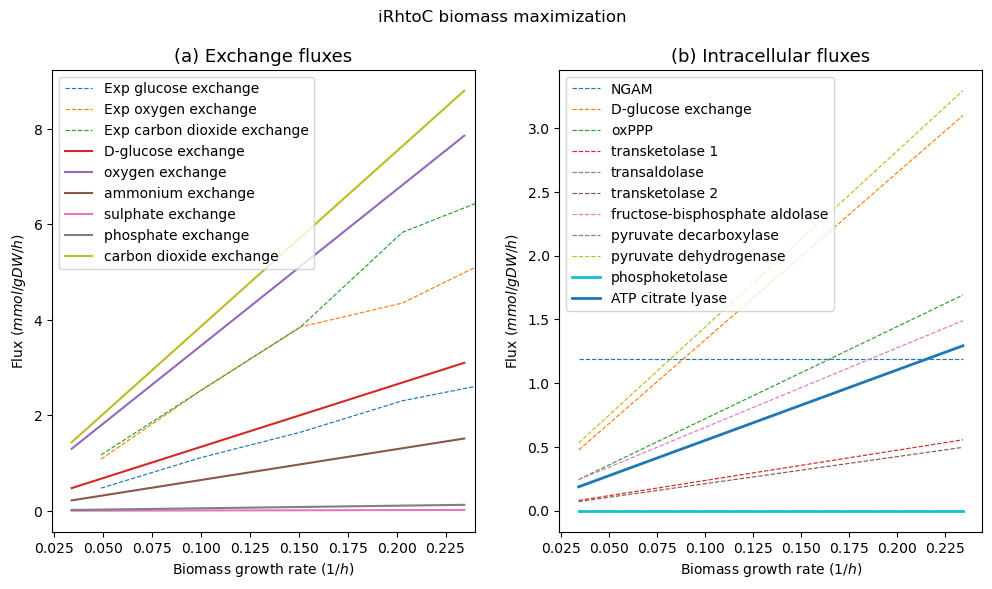

In [16]:
# Extract exchange fluxes and intracellular fluxes. 
# NB! Extract the flux of phosphoketolase and ACL separately for distinct visualization on figures
exchange_metabolites = ['EX_glc__D_e', 'EX_o2_e', 'EX_nh4_e','EX_so4_e','EX_pi_e', 'EX_co2_e']
exchange_fluxes = f.metabolites_fluxes(model_path, iRhtoC_all_fluxes_bm, exchange_metabolites)

intracellular_metabolites = ['ATPM_c', 'EX_glc__D_e', 'G6PDH2i_c', 'TKT1_c', 'TALA_c','TKT2_c', 'FBA_c',  'PYRDC_c','PDH_m'] #doesn't have 'XPK' (Xylulose-5-phosphate phosphoketolase), it has only 'FPK' (Fructose-6-phosphate phosphoketolase)
intracellular_fluxes = f.metabolites_fluxes(model_path, iRhtoC_all_fluxes_bm, intracellular_metabolites)

phosphoketolase_ACL =  ['PKETF_c', 'ACITL_c']
phosphoketolase_ACL_fluxes = f.metabolites_fluxes(model_path, iRhtoC_all_fluxes_bm, phosphoketolase_ACL)

title = 'iRhtoC biomass maximization'
fig = f.plot_ex_intr_fluxes(iRhtoC_all_fluxes_bm, exchange_fluxes, intracellular_fluxes, phosphoketolase_ACL_fluxes, title, biomass_rxn_ID)

# fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\iRhtoC_biomass_max.png")

In [17]:
intracellular_fluxes

,NGAM,D-glucose exchange,oxPPP,transketolase 1,transaldolase,transketolase 2,fructose-bisphosphate aldolase,pyruvate decarboxylase,pyruvate dehydrogenase
0,1.189,-0.476,0.244966,0.080545,0.0,0.07198,0.242963,0.0,0.53112
1,1.189,-1.114,0.596667,0.196186,0.0,0.175322,0.546388,0.0,1.202857
2,1.189,-1.648,0.891037,0.292975,0.0,0.261819,0.800353,0.0,1.765094
3,1.189,-2.305,1.253212,0.41206,0.0,0.368239,1.112814,0.0,2.456835
4,1.189,-3.1,1.69146,0.556157,0.0,0.497012,1.490907,0.0,3.293873


In [18]:
phosphoketolase_ACL_fluxes

,phosphoketolase,ATP citrate lyase
0,0.0,0.187384
1,0.0,0.456413
2,0.0,0.681589
3,0.0,0.95863
4,0.0,1.293863


COFACTOR balances

In [4]:
nadphs = ['nadph_c', 'nadph_l', 'nadph_m', 'nadph_r', 'nadph_rm','nadph_x']
nadhs = ['nadh_c', 'nadh_m', 'nadh_x', 'nadh_r', 'nadh_rm']
atps = ['atp_c', 'atp_m', 'atp_n', 'atp_r', 'atp_en', 'atp_gm', 'atp_l', 'atp_rm', 'atp_vm', 'atp_x'] 

i1 = 0
i2 = 4

SUM produced: 0.546344166103363, SUM consumed: -0.546344166092697
SUM produced: 1.3307390843981817, SUM consumed: -1.330739084409198
SUM produced: 1.9872702542561362, SUM consumed: -1.987270254187276
SUM produced: 2.795024895823131, SUM consumed: -2.7950248958231305
SUM produced: 3.7724448958925714, SUM consumed: -3.7724448957801715


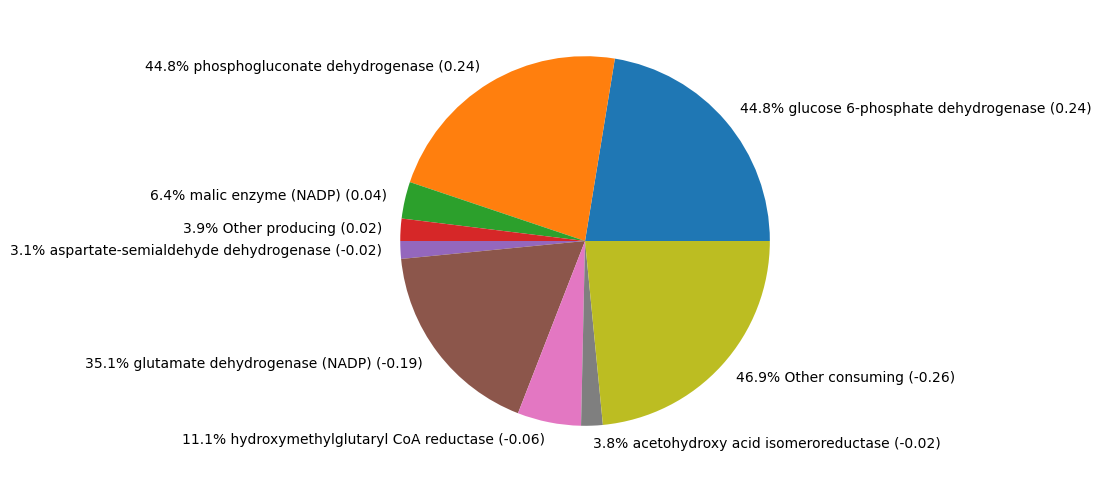

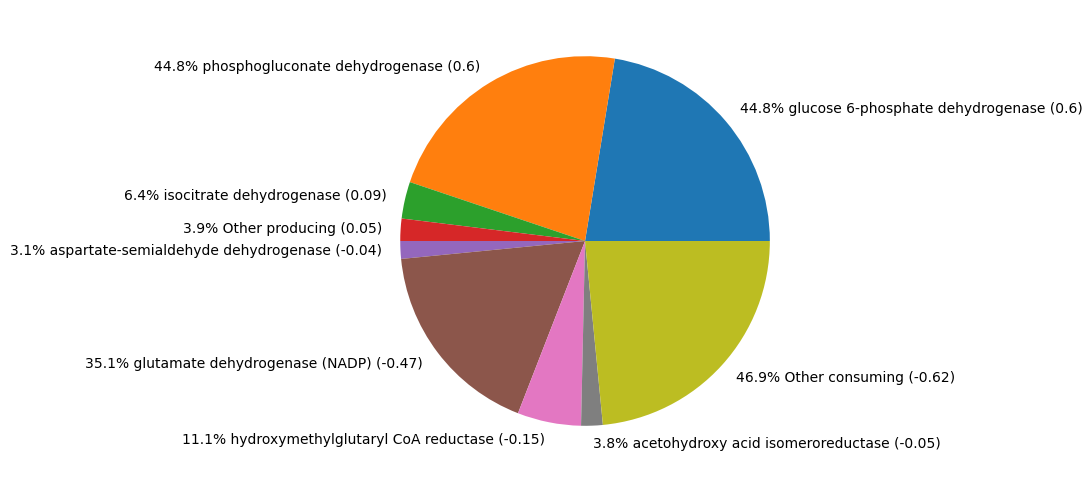

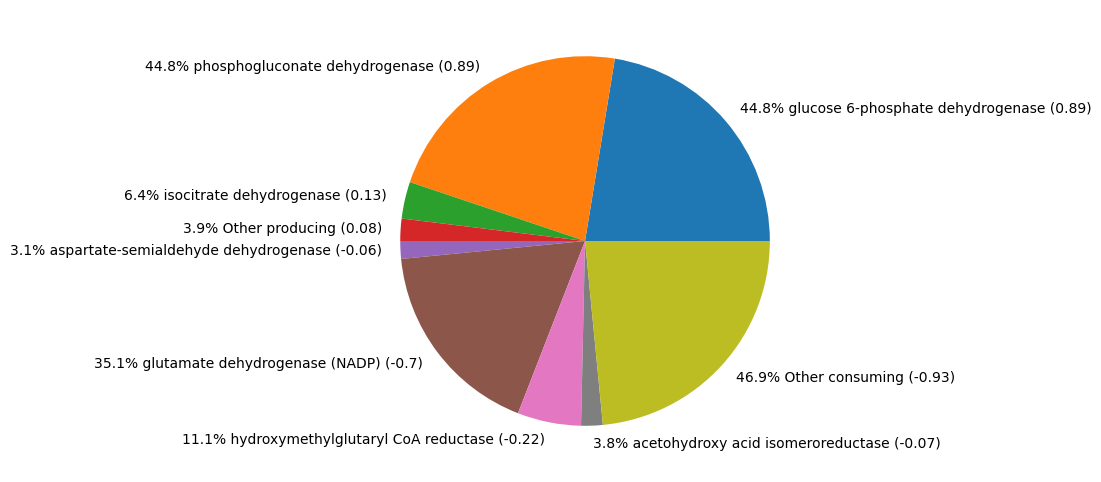

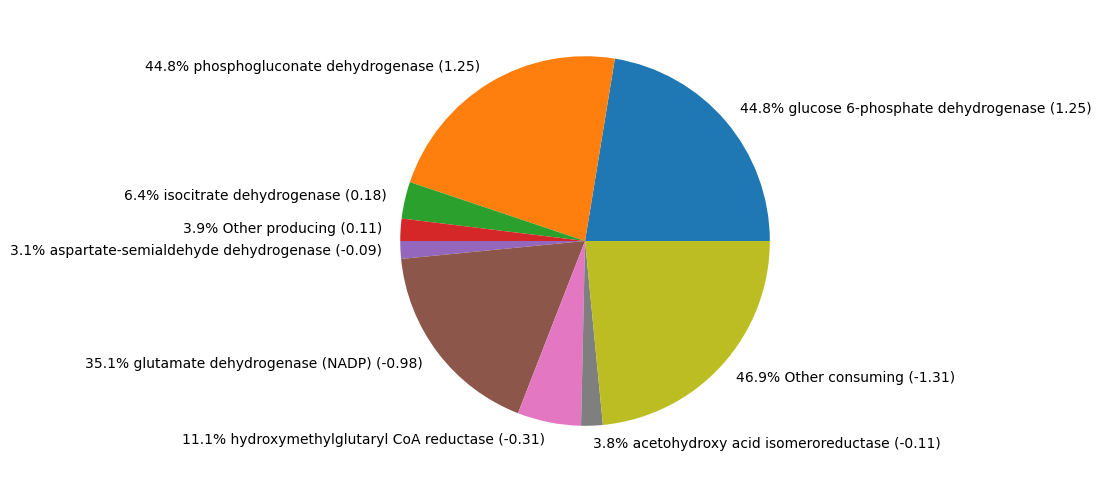

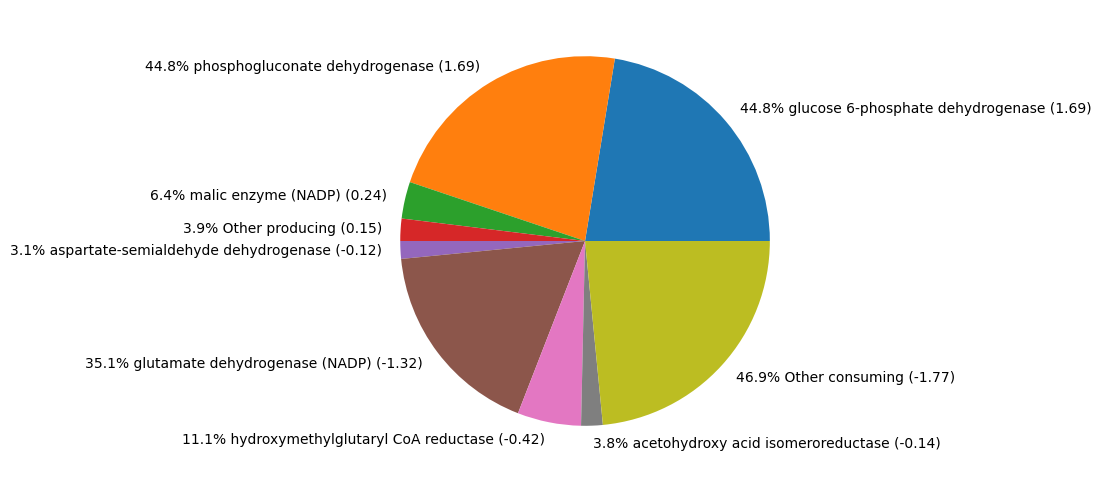

In [5]:
# nadph_fluxes_0 = f.cofactor_balances_biomass_max(model_path, nadphs, glucose_uptakes, i1, biomass_rxn_ID, glc_ID)

# pie_nadph_fluxes_0, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_0)
# fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\iRhtoC_bm_NADPH_min.png")

# nadph_fluxes_4 = f.cofactor_balances_biomass_max(model_path, nadphs, glucose_uptakes, i2, biomass_rxn_ID, glc_ID)
# pie_nadph_fluxes_4, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_4)
# fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\iRhtoC_bm_NADPH_max.png")

# pie_nadph_fluxes_0
# pie_nadph_fluxes_4



nadph_fluxes_0 = f.cofactor_balances_biomass_max(model_path, nadphs, glucose_uptakes, i1, biomass_rxn_ID, glc_ID)

pie_nadph_fluxes_0, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_0)
fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\iRhtoC_bm_NADPH_min.png")

# See on all GR
nadph_fluxes_1 = f.cofactor_balances_biomass_max(model_path, nadphs, glucose_uptakes, 1, biomass_rxn_ID, glc_ID)
fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\iRhtoC_bm_NADPH1.png")

nadph_fluxes_2 = f.cofactor_balances_biomass_max(model_path, nadphs, glucose_uptakes, 2, biomass_rxn_ID, glc_ID)
nadph_fluxes_3 = f.cofactor_balances_biomass_max(model_path, nadphs, glucose_uptakes, 3, biomass_rxn_ID, glc_ID)

pie_nadph_fluxes_1, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_1)
pie_nadph_fluxes_2, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_2)
pie_nadph_fluxes_3, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_3)

nadph_fluxes_4 = f.cofactor_balances_biomass_max(model_path, nadphs, glucose_uptakes, i2, biomass_rxn_ID, glc_ID)
pie_nadph_fluxes_4, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_4)


SUM produced: 2.997360597174085, SUM consumed: -2.997360597174085
SUM produced: 18.45572085372642, SUM consumed: -18.45572085372642


([<matplotlib.patches.Wedge at 0x1a73231cef0>,
 [Text(1.0177684489518604, 0.41730969832742293, '24.8% glyceraldehyde-3-phosphate dehydrogenase (4.57)'),
  Text(0.6656615851687623, 0.8757252160527358, '9.1% glycine-cleavage complex (lipoamide) (1.68)'),
  Text(0.36781505628219663, 1.0366832131235293, '10.6% isocitrate dehydrogenase (NAD+) (1.96)'),
  Text(-0.3857628604154346, 1.0301393185021637, '33.9% malate dehydrogenase (6.26)'),
  Text(-0.8951645423973892, 0.6392811916789614, '3.8% Other producing (0.7)'),
  Text(-1.057055480882569, 0.3043578655729484, '17.8% pyruvate dehydrogenase (3.29)'),
  Text(-1.0074491358132271, -0.4416403952869144, '26.3% malate dehydrogenase (-4.85)'),
  Text(0.4238008402834575, -1.0150826802655217, '72.6% NADH:ubiquinone oxidoreductase (complex I) (-13.39)'),
  Text(1.0998288556074234, -0.019403308307235204, '1.1% Other consuming (-0.21)')])

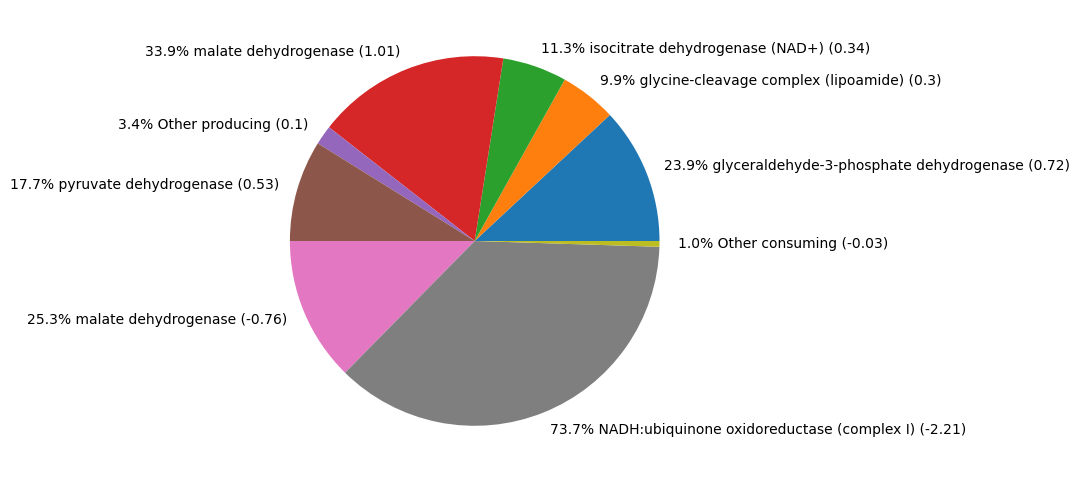

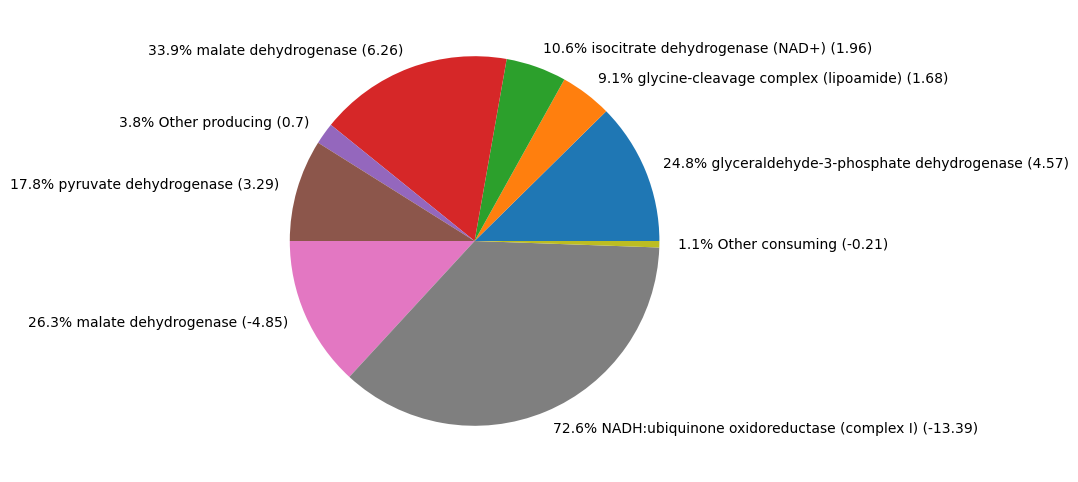

In [17]:
nadh_fluxes_0 = f.cofactor_balances_biomass_max(model_path, nadhs, glucose_uptakes, i1, biomass_rxn_ID, glc_ID)
pie_nadh_fluxes_0, fig = f.cofactor_fluxes_pie_chart(model_path, nadh_fluxes_0)
fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\iRhtoC_bm_NADH_0.png")

nadh_fluxes_4 = f.cofactor_balances_biomass_max(model_path, nadhs, glucose_uptakes, i2, biomass_rxn_ID, glc_ID)
pie_nadh_fluxes_4, fig = f.cofactor_fluxes_pie_chart(model_path, nadh_fluxes_4)
fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\iRhtoC_bm_NADH_4.png")

pie_nadh_fluxes_0
pie_nadh_fluxes_4

SUM produced: 8.822347999638913, SUM consumed: -8.822347999633585
SUM produced: 53.52295497324492, SUM consumed: -53.522954973188746


([<matplotlib.patches.Wedge at 0x1a7324327e0>,
 [Text(0.33331668051412966, 1.0482843080438826, '80.4% ATP synthase (43.03)'),
  Text(-0.9283637765396361, 0.5900344891691205, '3.2% Other producing (1.69)'),
  Text(-1.0205348051087735, 0.4104981261365245, '8.5% phosphoglycerate kinase (4.57)'),
  Text(-1.0915363915240381, 0.13619216562887185, '7.9% pyruvate kinase (4.23)'),
  Text(-0.45135477749861, -1.0031345198073789, '73.1% Biomass_Rt_Clim (-39.12)'),
  Text(0.8013727356012281, -0.753526203018186, '5.8% hexokinase (D-glucose:ATP) (-3.1)'),
  Text(1.039993020148352, -0.3583497147239127, '21.1% Other consuming (-11.31)')])

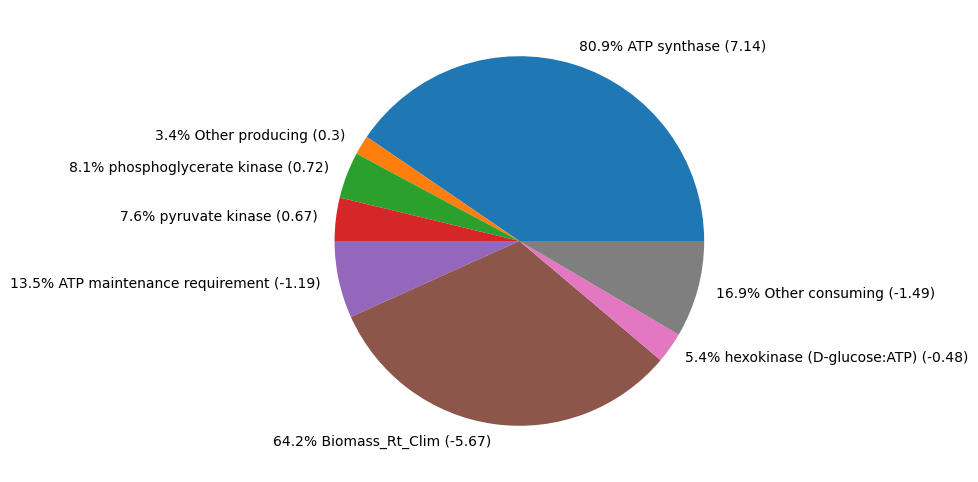

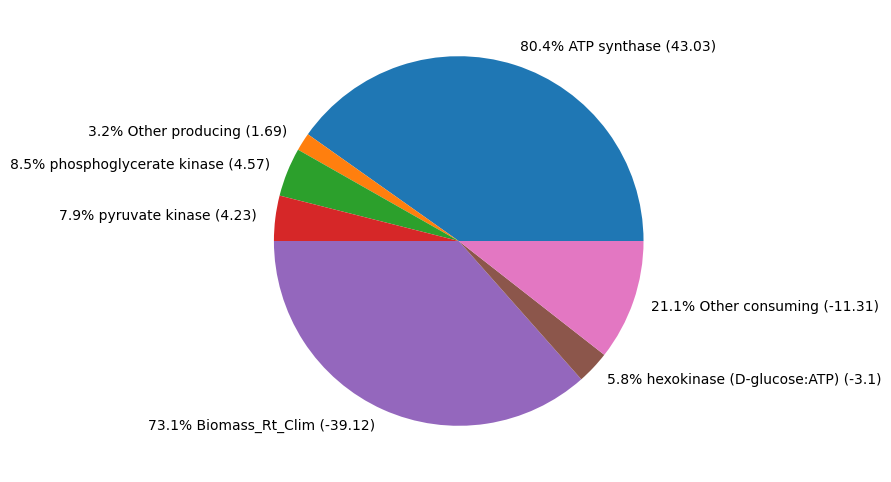

In [18]:
atp_fluxes_0 = f.cofactor_balances_biomass_max(model_path, atps, glucose_uptakes, i1, biomass_rxn_ID, glc_ID)
pie_atp_fluxes_0, fig = f.cofactor_fluxes_pie_chart(model_path, atp_fluxes_0)
fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\iRhtoC_bm_atp_0.png")

atp_fluxes_4 = f.cofactor_balances_biomass_max(model_path, atps, glucose_uptakes, i2, biomass_rxn_ID, glc_ID)
pie_atp_fluxes_4, fig = f.cofactor_fluxes_pie_chart(model_path, atp_fluxes_4)
fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\iRhtoC_bm_atp_4.png")

pie_atp_fluxes_0
pie_atp_fluxes_4

### NGAM minimisation

In [6]:
# growth_rates = 
NGAM_rxn_ID = "ATPM_c"

iRhtoC_all_fluxes_nm = f.all_fluxes_NGAM_min_df(model_path, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID)

exchange_fluxes = f.metabolites_fluxes(model_path, iRhtoC_all_fluxes_nm, exchange_metabolites)
intracellular_fluxes = f.metabolites_fluxes(model_path, iRhtoC_all_fluxes_nm, intracellular_metabolites)
phosphoketolase_ACL_fluxes = f.metabolites_fluxes(model_path, iRhtoC_all_fluxes_nm, phosphoketolase_ACL)

title = 'iRhtoC NGAM minimization'
fig = f.plot_ex_intr_fluxes(iRhtoC_all_fluxes_nm, exchange_fluxes, intracellular_fluxes, phosphoketolase_ACL_fluxes, title, biomass_rxn_ID)

fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\iRhtoC_NGAM_min.png")

NameError: name 'exchange_metabolites' is not defined

COFACTOR balances

SUM produced: 0.5463441660913141, SUM consumed: -0.5463441660851144
SUM produced: 1.3307390843981763, SUM consumed: -1.3307390844059608
SUM produced: 1.9872702542321643, SUM consumed: -1.987270254165851
SUM produced: 2.795024895794992, SUM consumed: -2.7950248958777175
SUM produced: 3.772444895920755, SUM consumed: -3.772444895805179


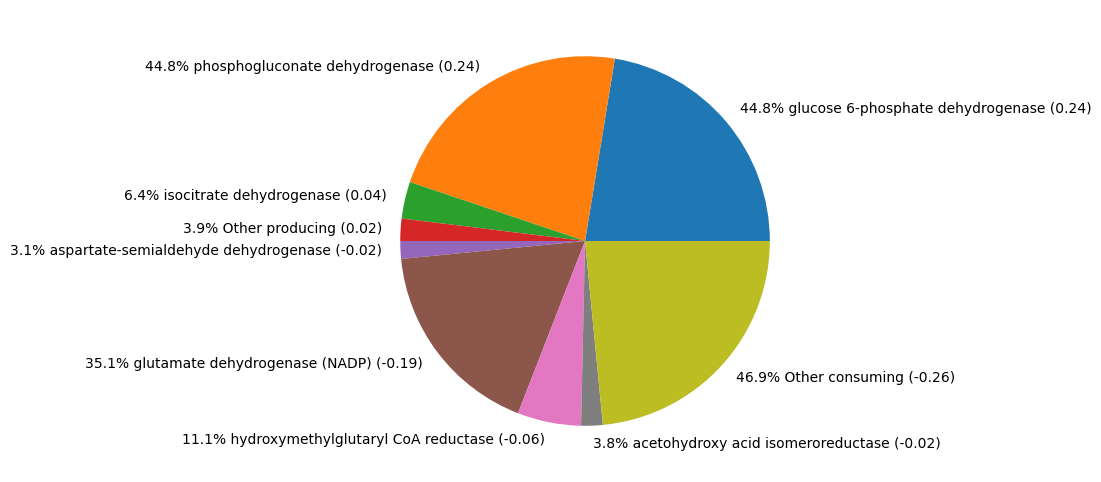

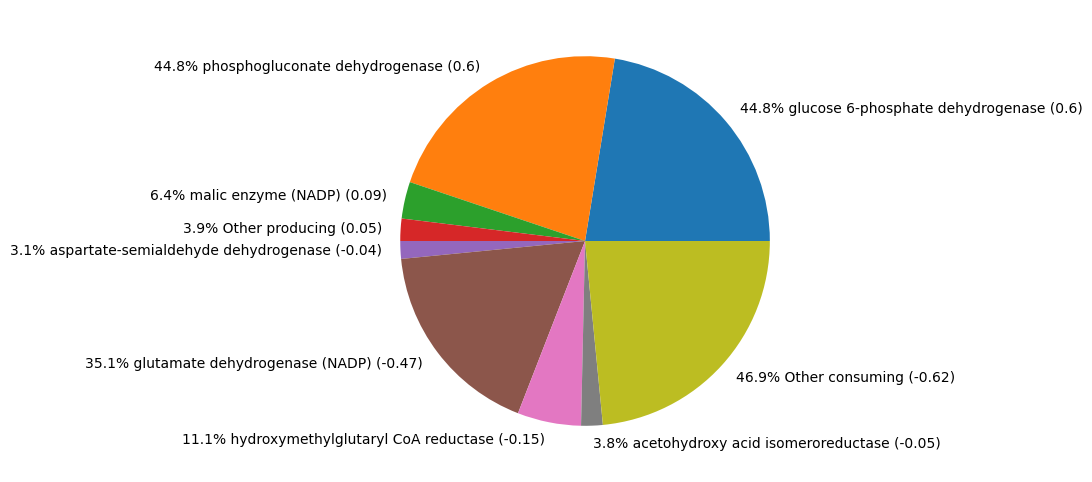

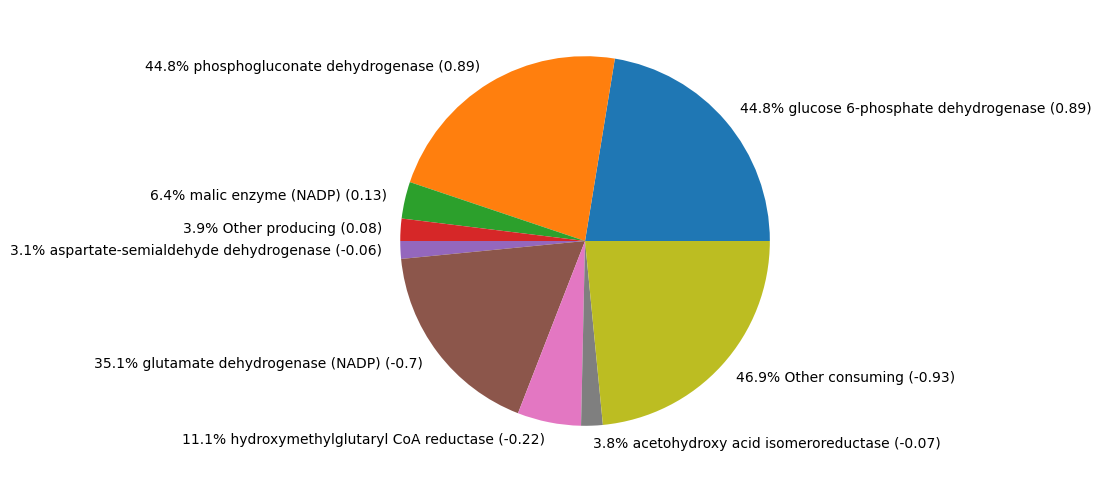

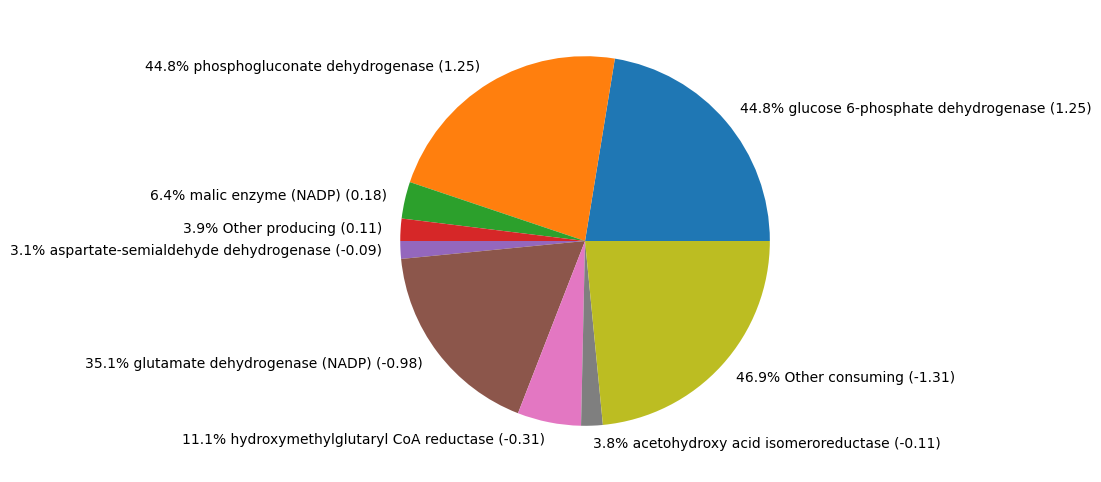

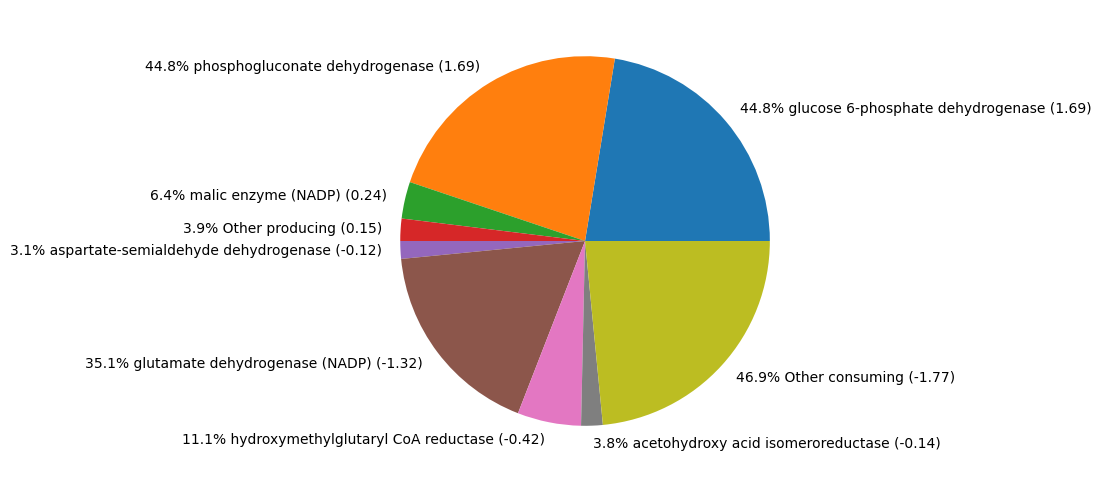

In [7]:
NGAM_rxn_ID = 'ATPM_c'
# nadph_fluxes_0 = f.cofactor_balances_NGAM_min(model_path, nadphs, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID, i1)

# pie_nadph_fluxes_0, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_0)
# fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\iRhtoC_nm_NADPH_min.png")

# nadph_fluxes_4 = f.cofactor_balances_NGAM_min(model_path, nadphs, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID, i2)
# pie_nadph_fluxes_4, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_4)
# fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\iRhtoC_nm_NADPH_max.png")

# pie_nadph_fluxes_0
# pie_nadph_fluxes_4



nadph_fluxes_0 = f.cofactor_balances_NGAM_min(model_path, nadphs, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID, i1)

pie_nadph_fluxes_0, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_0)
fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\iRhtoC_nm_NADPH_min.png")

nadph_fluxes_1 = f.cofactor_balances_NGAM_min(model_path, nadphs, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID, 1)
pie_nadph_fluxes_1, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_1)
fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\iRhtoC_nm_NADPH1.png")
 
nadph_fluxes_2 = f.cofactor_balances_NGAM_min(model_path, nadphs, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID, 2)
pie_nadph_fluxes_2, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_2)

nadph_fluxes_3 = f.cofactor_balances_NGAM_min(model_path, nadphs, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID, 3)
pie_nadph_fluxes_3, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_3) 

nadph_fluxes_4 = f.cofactor_balances_NGAM_min(model_path, nadphs, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID, i2)
pie_nadph_fluxes_4, fig = f.cofactor_fluxes_pie_chart(model_path, nadph_fluxes_4)


SUM produced: 2.997360597176117, SUM consumed: -2.997360597174104
SUM produced: 18.455720853721633, SUM consumed: -18.45572085372635


([<matplotlib.patches.Wedge at 0x1a72de8d9a0>,
 [Text(1.0177684489518604, 0.41730969832742293, '24.8% glyceraldehyde-3-phosphate dehydrogenase (4.57)'),
  Text(0.6656615851687623, 0.8757252160527358, '9.1% glycine-cleavage complex (lipoamide) (1.68)'),
  Text(0.36781505628219663, 1.0366832131235293, '10.6% isocitrate dehydrogenase (NAD+) (1.96)'),
  Text(-0.3857628604154346, 1.0301393185021637, '33.9% malate dehydrogenase (6.26)'),
  Text(-0.8951645423973892, 0.6392811916789614, '3.8% Other producing (0.7)'),
  Text(-1.057055480882569, 0.3043578655729484, '17.8% pyruvate dehydrogenase (3.29)'),
  Text(-1.0074491358132271, -0.4416403952869144, '26.3% malate dehydrogenase (-4.85)'),
  Text(0.4238008402834575, -1.0150826802655217, '72.6% NADH:ubiquinone oxidoreductase (complex I) (-13.39)'),
  Text(1.0998288556074234, -0.019403308307235204, '1.1% Other consuming (-0.21)')])

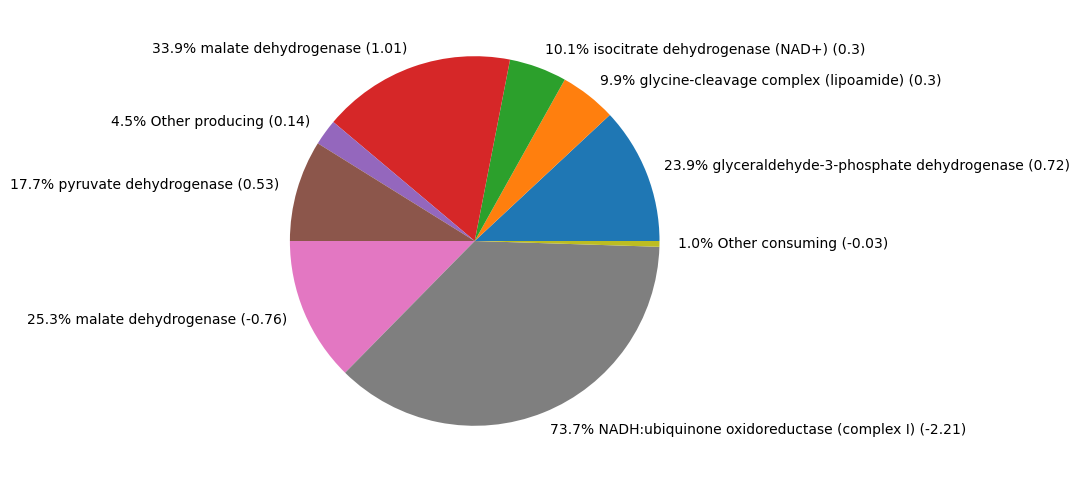

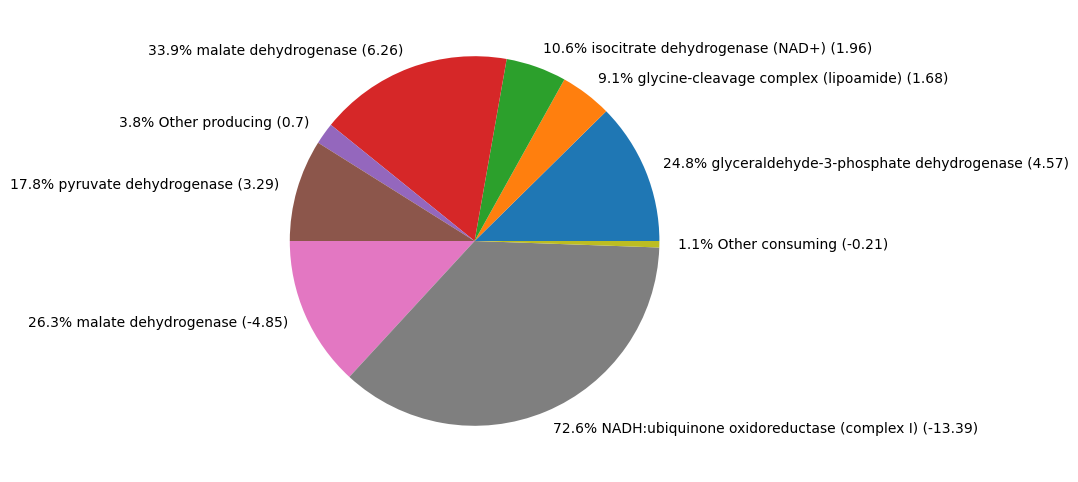

In [20]:
nadh_fluxes_0 = f.cofactor_balances_NGAM_min(model_path, nadhs, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID, i1)
pie_nadh_fluxes_0, fig = f.cofactor_fluxes_pie_chart(model_path, nadh_fluxes_0)
fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\iRhtoC_nm_NADH_0.png")

nadh_fluxes_4 = f.cofactor_balances_NGAM_min(model_path, nadhs, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID, i2)
pie_nadh_fluxes_4, fig = f.cofactor_fluxes_pie_chart(model_path, nadh_fluxes_4)
fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\iRhtoC_nm_NADH_4.png")

pie_nadh_fluxes_0
pie_nadh_fluxes_4

SUM produced: 8.822347999638442, SUM consumed: -8.822347910373823
SUM produced: 53.52295497325027, SUM consumed: -53.52295497321591


([<matplotlib.patches.Wedge at 0x1a72d1da030>,
 [Text(0.33331668051412966, 1.0482843080438826, '80.4% ATP synthase (43.03)'),
  Text(-0.9283637765396361, 0.5900344891691205, '3.2% Other producing (1.69)'),
  Text(-1.0205348051087735, 0.4104981261365245, '8.5% phosphoglycerate kinase (4.57)'),
  Text(-1.0915363915240381, 0.13619216562887185, '7.9% pyruvate kinase (4.23)'),
  Text(-0.45135477749861, -1.0031345198073789, '73.1% Biomass_Rt_Clim (-39.12)'),
  Text(0.8013727356012281, -0.753526203018186, '5.8% hexokinase (D-glucose:ATP) (-3.1)'),
  Text(1.039993020148352, -0.3583497147239127, '21.1% Other consuming (-11.31)')])

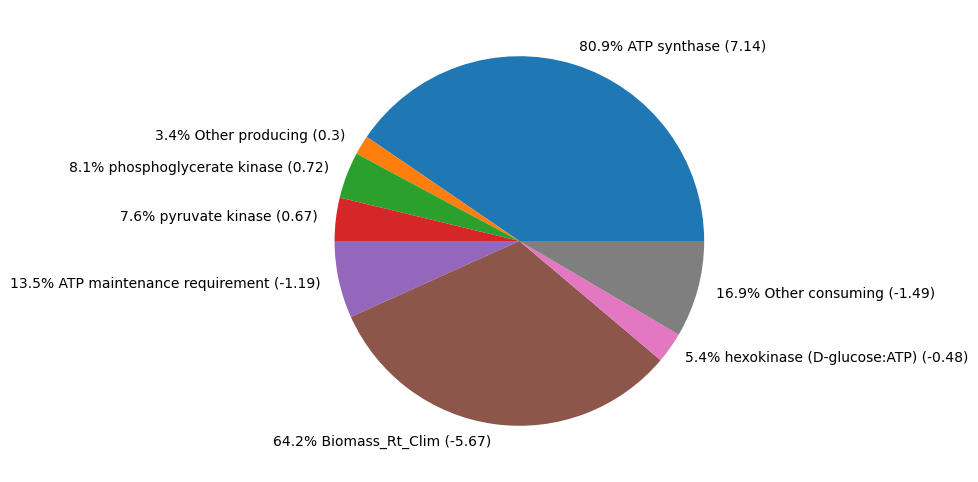

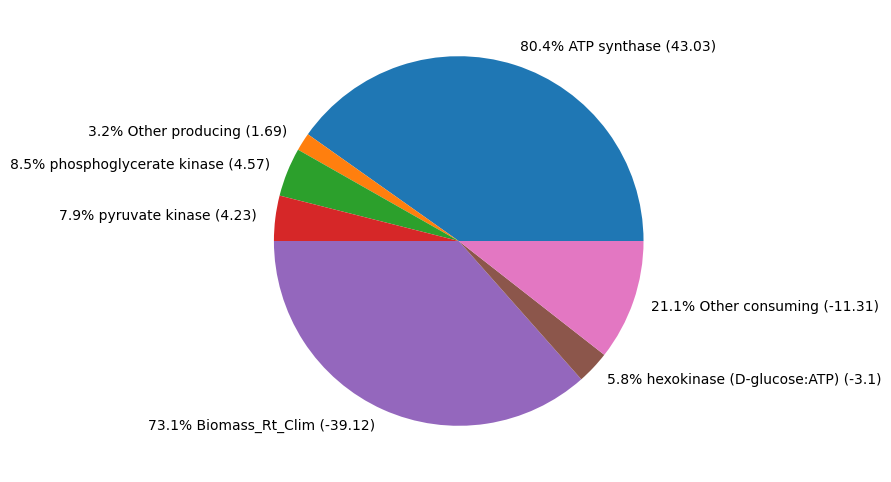

In [21]:
atp_fluxes_0 = f.cofactor_balances_NGAM_min(model_path, atps, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID, i1)
pie_atp_fluxes_0, fig = f.cofactor_fluxes_pie_chart(model_path, atp_fluxes_0)
fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\iRhtoC_nm_atp_0.png")

atp_fluxes_4 = f.cofactor_balances_NGAM_min(model_path, atps, glucose_uptakes, growth_rates, NGAM_rxn_ID, glc_ID, biomass_rxn_ID, i2)
pie_atp_fluxes_4, fig = f.cofactor_fluxes_pie_chart(model_path, atp_fluxes_4)
fig.savefig("..\\..\\Thesis_paper_latex\\Pictures\\iRhtoC_nm_atp_4.png")

pie_atp_fluxes_0
pie_atp_fluxes_4

In [14]:
# All NGAM min fluxes to excel

# path = 
# f.all_fluxes_to_excel(path, ngam_IFO_all_fluxes)

In [15]:
# import pickle

# with open("../cofactor_comparison/iRhtoC_cofactors.pk", "wb") as f:
#     pickle.dump([nadph_fluxes_lowest_GR, nadph_fluxes_highest_GR, nadh_fluxes_lowest_GR, nadh_fluxes_highest_GR, atp_fluxes_lowest_GR, atp_fluxes_highest_GR], f)